In [415]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

#plt.style.use(['science', 'notebook'])
#%matplotlib inline


In [416]:
data_file = "conso.txt"

In [417]:
def read_text(filename):
    f = open(filename, "r")
    text = f.readlines()
    f.close()
    print(text)

#read_text(data_file)
def get_data(filename):    
    data = pd.read_csv(filename)
    #data['time'] = pd.to_datetime(data['time'])  #.dt.tz_convert(None)
    #data.info()
    #print(data.tail(5))
    return data


In [418]:
# read data with pandas
data = get_data(data_file)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Conso   1013 non-null   float64
dtypes: float64(1)
memory usage: 8.0 KB


In [419]:
data['interval']=3600/data['Conso']
data

,Conso,interval
0,0.19,18947.368421
1,0.19,18947.368421
2,0.19,18947.368421
3,0.19,18947.368421
4,0.19,18947.368421
...,...,...
1008,0.16,22500.000000
1009,0.16,22500.000000
1010,0.17,21176.470588
1011,0.17,21176.470588


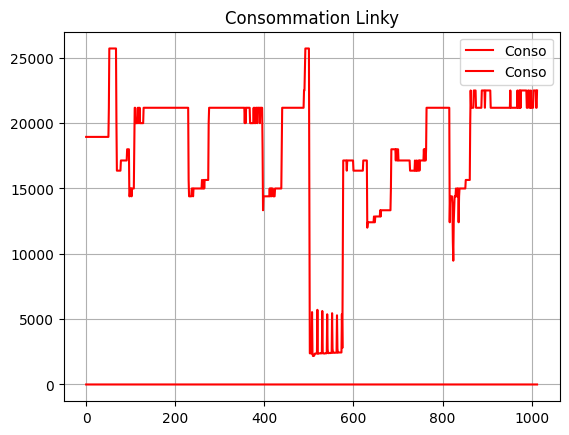

In [420]:

plt.title('Consommation Linky')
plt.plot(data, color='red',label='Conso')

plt.grid()
plt.legend()

### conso.csv sur WD6TB mis à jour avec PI4

In [421]:
def get_data2(filename):    
    data = pd.read_csv(filename, names=["Interval","kWh"])
    return data

In [422]:
old = False

if old:
    #conso_file = r"C:\Users\jean\Documents\conso.csv"
    conso_file = r"Y:\Documents\conso_old.csv"
    conso_file = r"Y:\Documents\conso - Copy (2).csv"
else:
    conso_file = r"Y:\Documents\conso.csv"
#old = False
conso_data = get_data2(conso_file)
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80415 entries, 0 to 80414
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Interval  80415 non-null  int64  
 1   kWh       80415 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.2 MB


In [423]:
conso_data = conso_data.dropna()
conso_data

,Interval,kWh
0,26289,0.14
1,26243,0.14
2,25885,0.14
3,25754,0.14
4,25774,0.14
...,...,...
80410,23953,0.15
80411,23904,0.15
80412,23005,0.16
80413,22714,0.16


In [424]:
conso_data['sec']=conso_data['Interval']/1000
conso_data['Wh']=3600000/conso_data['Interval']
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

conso_data

,Interval,kWh,sec,Wh,cumul(ms)
0,26289,0.14,26.289,136.939404,26289
1,26243,0.14,26.243,137.179438,52532
2,25885,0.14,25.885,139.076685,78417
3,25754,0.14,25.754,139.784111,104171
4,25774,0.14,25.774,139.675642,129945
...,...,...,...,...,...
80410,23953,0.15,23.953,150.294326,1935170076
80411,23904,0.15,23.904,150.602410,1935193980
80412,23005,0.16,23.005,156.487720,1935216985
80413,22714,0.16,22.714,158.492560,1935239699


In [425]:
# index dernier echantillon
l=len(conso_data)-1
l

80414

In [426]:
# cumtime = int(conso_data['cumul(ms)'].tail(1).values[0]*1000)
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

1935262969000

In [427]:
old

False

In [428]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début


datetime.datetime(2024, 3, 7, 0, 31, 15, 923788)

In [429]:

if old:
    base = dt.datetime(2023, 8, 1, 10, 45, 0) - timedelta(microseconds=cumtime)


conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80415 entries, 0 to 80414
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   80415 non-null  int64         
 1   kWh        80415 non-null  float64       
 2   sec        80415 non-null  float64       
 3   Wh         80415 non-null  float64       
 4   cumul(ms)  80415 non-null  int64         
 5   dates      80415 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 3.7 MB


In [430]:
conso_data['days']= [d.strftime('%d/%m/%Y') for d in conso_data['dates']]    #[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 00:31:42.212788,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 00:32:08.455788,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 00:32:34.340788,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 00:33:00.094788,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 00:33:25.868788,07/03/2024
...,...,...,...,...,...,...,...
80410,23953,0.15,23.953,150.294326,1935170076,2024-03-29 10:04:05.999788,29/03/2024
80411,23904,0.15,23.904,150.602410,1935193980,2024-03-29 10:04:29.903788,29/03/2024
80412,23005,0.16,23.005,156.487720,1935216985,2024-03-29 10:04:52.908788,29/03/2024
80413,22714,0.16,22.714,158.492560,1935239699,2024-03-29 10:05:15.622788,29/03/2024


In [431]:
#conso_data
conso_data.head(1),conso_data.tail(1)

(   Interval   kWh     sec          Wh  cumul(ms)                      dates  \
 0     26289  0.14  26.289  136.939404      26289 2024-03-07 00:31:42.212788   
 
          days  
 0  07/03/2024  ,
        Interval   kWh    sec         Wh   cumul(ms)  \
 80414     23270  0.15  23.27  154.70563  1935262969   
 
                            dates        days  
 80414 2024-03-29 10:05:38.892788  29/03/2024  )

In [432]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
day = now.strftime('%d/%m/%Y')    #str(now.month)+'-'+str(now.day)
day

'29/03/2024'

In [433]:
month, year

(3, 2024)

In [434]:
def conso_by_day(day):
    conso_day = conso_data[conso_data['days']==day]
    conso_jour = len(conso_day)/1000
    return conso_jour



In [435]:
conso_graph=[]
for d in range(7,now.day+1):
    if d<10:prefd='0'
    else:prefd=''
    if month<10:prefm='0'
    else:prefm=''
    day = f'{prefd}{d}/{prefm}{month}/{year}'
    conso_graph.append((day,conso_by_day(day)))
    #print(day,conso_by_day(day))
conso_df = pd.DataFrame(conso_graph, columns=('day','conso'))
conso_df.set_index('day',inplace=True)
conso_df

,conso
day,
07/03/2024,3.319
08/03/2024,3.767
09/03/2024,3.059
10/03/2024,3.568
11/03/2024,4.529
12/03/2024,3.549
13/03/2024,3.508
14/03/2024,3.702
15/03/2024,3.545


In [436]:

mean = conso_df['conso'].mean()
mean


3.4963043478260873

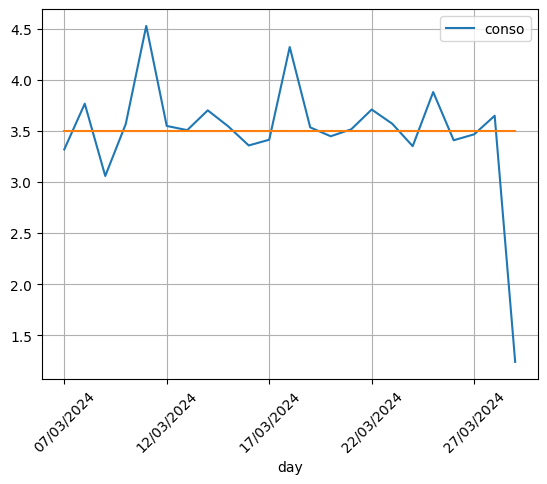

In [437]:
conso_df.plot()
plt.plot()
plt.plot((0,len(conso_graph)-1),(mean,mean))
plt.xticks(rotation=45)
plt.grid()


In [438]:
#manuel
#day = '25/03/2024'


In [439]:
# conso day
conso_day = conso_data[conso_data['days']==day]
conso_jour = len(conso_day)
conso_jour

1238

In [440]:
conso_day.head(1).dates, conso_day.tail(1).dates
conso_day['heure']=conso_day['dates'].map(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
conso_day
df= conso_day.set_index('heure')
df

C:\Users\jean\AppData\Local\Temp\ipykernel_14100\1879875640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_day['heure']=conso_day['dates'].map(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))


,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:8,25899,0.14,25.899,139.001506,1898932453,2024-03-29 00:00:08.376788,29/03/2024
0:0:33,25079,0.14,25.079,143.546393,1898957532,2024-03-29 00:00:33.455788,29/03/2024
0:0:58,25143,0.14,25.143,143.181005,1898982675,2024-03-29 00:00:58.598788,29/03/2024
0:1:24,25644,0.14,25.644,140.383715,1899008319,2024-03-29 00:01:24.242788,29/03/2024
0:1:50,26026,0.14,26.026,138.323215,1899034345,2024-03-29 00:01:50.268788,29/03/2024
...,...,...,...,...,...,...,...
10:4:5,23953,0.15,23.953,150.294326,1935170076,2024-03-29 10:04:05.999788,29/03/2024
10:4:29,23904,0.15,23.904,150.602410,1935193980,2024-03-29 10:04:29.903788,29/03/2024
10:4:52,23005,0.16,23.005,156.487720,1935216985,2024-03-29 10:04:52.908788,29/03/2024


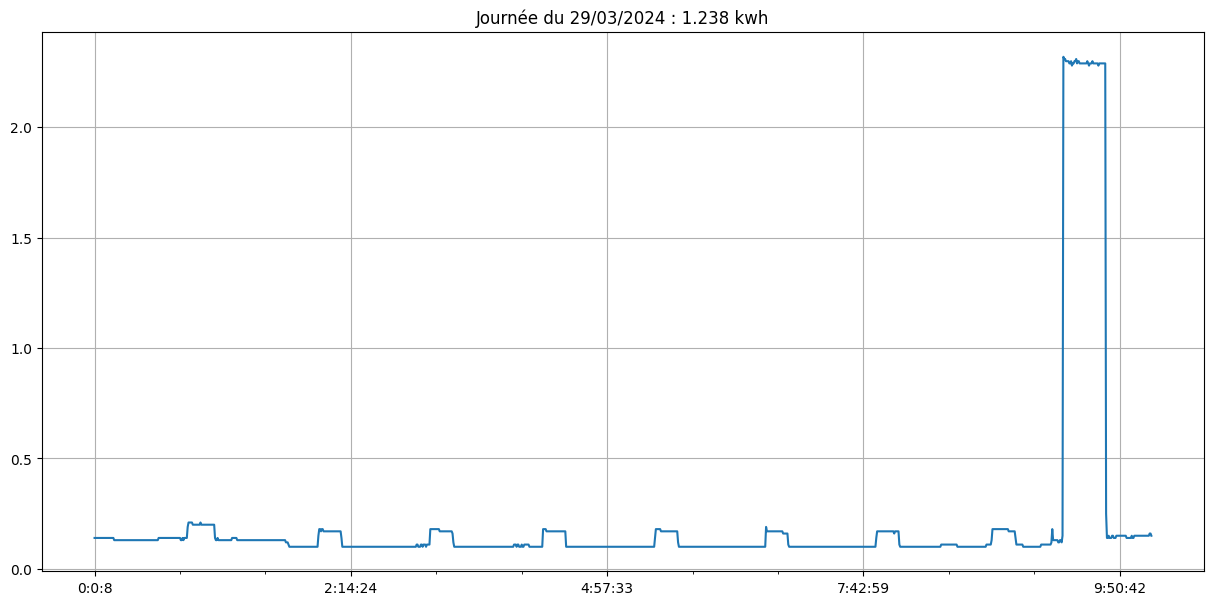

In [441]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
# consommation d'une journée entière à partir de minuit
fig, ax = plt.subplots()
major_ticks=300;minor_ticks=100
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
# the size of A4 paper
fig.set_size_inches(15, 7)
plt.plot(df['kWh'])
#plt.plot(conso_day['heure'],conso_day['kWh'])
plt.title(f'Journée du {day} : {conso_jour/1000} kwh')
plt.grid()

50

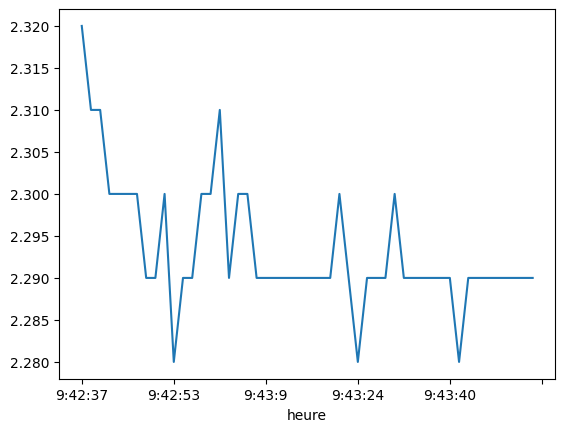

In [442]:
# bouilloire, microondes, four
filter=(.5<df['kWh'])
pic_high = df[filter]
pic_high['kWh'].plot()
len(pic_high)

559

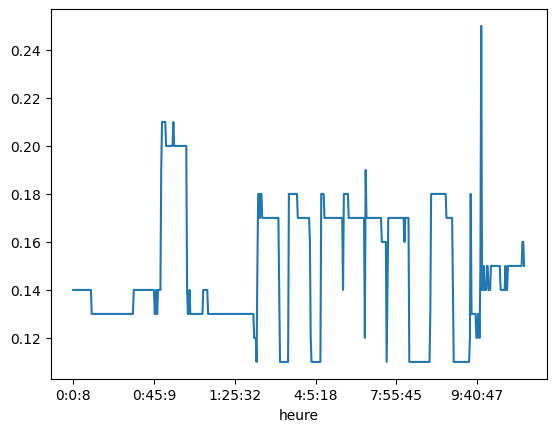

In [443]:
# frigo, moteur volet
pic_middle = df[(0.1<df['kWh']) & (df['kWh']<=.5)]
pic_middle['kWh'].plot()
len(pic_middle) # wh

1188

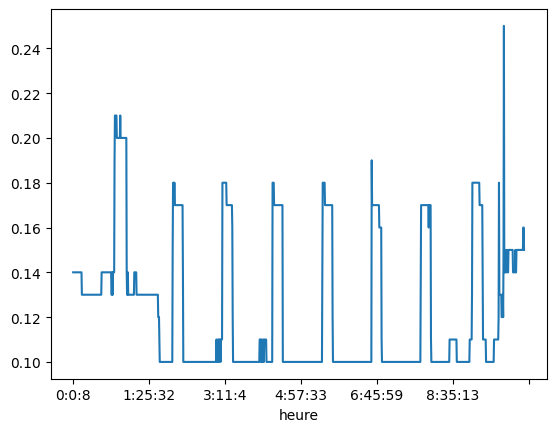

In [444]:
# pics frigo par jour
filter = (df['kWh']<=0.5)
pic_low = df[filter]
pic_low['kWh'].plot()
len(pic_low) # wh

In [445]:
time = conso_data['dates']
time


0       2024-03-07 00:31:42.212788
1       2024-03-07 00:32:08.455788
2       2024-03-07 00:32:34.340788
3       2024-03-07 00:33:00.094788
4       2024-03-07 00:33:25.868788
                   ...            
80410   2024-03-29 10:04:05.999788
80411   2024-03-29 10:04:29.903788
80412   2024-03-29 10:04:52.908788
80413   2024-03-29 10:05:15.622788
80414   2024-03-29 10:05:38.892788
Name: dates, Length: 80415, dtype: datetime64[ns]

In [446]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    #plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [447]:
if not old:
    major_ticks=1/60;minor_ticks=1/240  # plus de ticks, 4 fois plus de minor
    major_ticks=1/30;minor_ticks=1/120   # moins de ticks
    major_ticks=1/15;minor_ticks=1/60
    major_ticks=1/2;minor_ticks=1/8
else:
    major_ticks=4;minor_ticks=1   # encore moins si int


In [448]:
major_ticks=4;minor_ticks=1
major_ticks,minor_ticks

(4, 1)

## Main graph

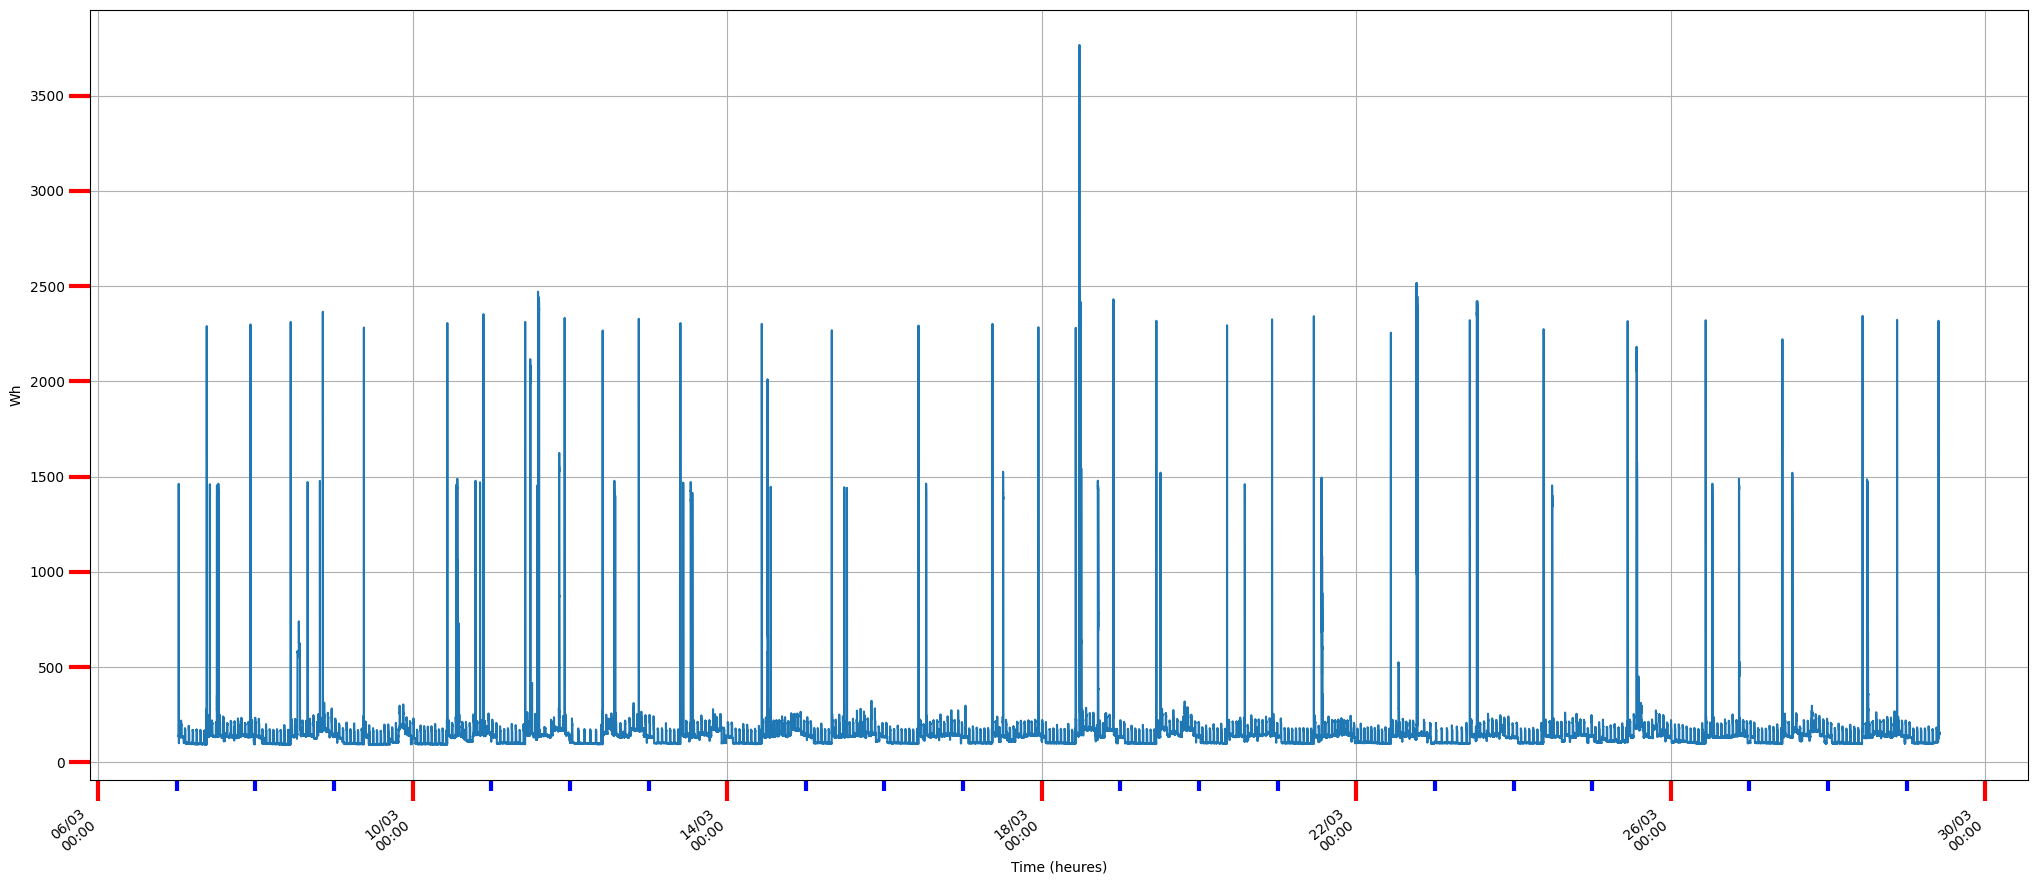

In [449]:

from matplotlib.dates import (YEARLY, DateFormatter,rrulewrapper, RRuleLocator, drange)

def show_graph():
    fig, ax = plt.subplots()
    # the size of A4 paper
    fig.set_size_inches(25, 10)

    #plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
    
    #formatter = DateFormatter('%d/%m\n%H:%M:%S')
    formatter = DateFormatter('%d/%m\n%H:%M')
    ax.xaxis.set_major_formatter(formatter)

    # ticks sur axe des x
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # minor ticks tous les 5 min
    ax.tick_params(which='both', width=3)
    ax.tick_params(which='major', length=15, color='r')
    ax.tick_params(which='minor', length=8, color='b')

    #plt.plot(conso_data['cumul(ms)']/3600000,conso_data['Wh'])
    plt.plot(time,conso_data['Wh'])
    plt.ylabel('Wh')
    plt.xlabel('Time (heures)')
    #format_date(10)
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')

    #fig.autofmt_xdate()
    
    plt.grid()
    plt.show()
show_graph()

In [450]:
cumul_conso = len(conso_data)
conso_data.tail(1)

,Interval,kWh,sec,Wh,cumul(ms),dates,days
80414,23270,0.15,23.27,154.70563,1935262969,2024-03-29 10:05:38.892788,29/03/2024


In [451]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

1935262969000

# Slice of last 1 kWh

In [452]:
l = len(conso_data)  # total watt consommés
l

80415

In [453]:
k = 1
taille = k*1000  # fenetre k*1000 watt consommés
l,taille

(80415, 1000)

In [454]:
if l<1000:
    part = 1
else: part = 1/2
#taille = int(part*l)
taille

1000

In [455]:
data = conso_data.tail(taille)
len(data),data

(1000,
        Interval   kWh     sec          Wh   cumul(ms)  \
 79415     34792  0.10  34.792  103.472063  1905196649   
 79416     34991  0.10  34.991  102.883599  1905231640   
 79417     34939  0.10  34.939  103.036721  1905266579   
 79418     34767  0.10  34.767  103.546466  1905301346   
 79419     34868  0.10  34.868  103.246530  1905336214   
 ...         ...   ...     ...         ...         ...   
 80410     23953  0.15  23.953  150.294326  1935170076   
 80411     23904  0.15  23.904  150.602410  1935193980   
 80412     23005  0.16  23.005  156.487720  1935216985   
 80413     22714  0.16  22.714  158.492560  1935239699   
 80414     23270  0.15  23.270  154.705630  1935262969   
 
                            dates        days  
 79415 2024-03-29 01:44:32.572788  29/03/2024  
 79416 2024-03-29 01:45:07.563788  29/03/2024  
 79417 2024-03-29 01:45:42.502788  29/03/2024  
 79418 2024-03-29 01:46:17.269788  29/03/2024  
 79419 2024-03-29 01:46:52.137788  29/03/2024  
 ...   

In [456]:
now = datetime.now()
# conso.csv dynamique
cumtime_start= int(conso_data._get_value(l-taille+1,'cumul(ms)')*1000) # conversion microseconds


In [457]:
cumtime_end= int(data._get_value(l-1,'cumul(ms)')*1000) # conversion microseconds


In [458]:
cumtime_end,cumtime_start

(1935262969000, 1905231640000)

In [459]:
#last_interval = int(data._get_value(l,'Interval')*1000) # conversion microseconds
delta_cumtime = cumtime_end - cumtime_start #+ last_interval
delta_cumtime

30031329000

In [460]:

base = now - timedelta(microseconds=delta_cumtime)
now,base, data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')


(datetime.datetime(2024, 3, 29, 10, 5, 46, 368420),
 datetime.datetime(2024, 3, 29, 1, 45, 15, 39420),
 '29/03/2024 10:05:38')

In [461]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 00:31:42.212788,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 00:32:08.455788,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 00:32:34.340788,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 00:33:00.094788,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 00:33:25.868788,07/03/2024
...,...,...,...,...,...,...,...
80410,23953,0.15,23.953,150.294326,1935170076,2024-03-29 10:04:05.999788,29/03/2024
80411,23904,0.15,23.904,150.602410,1935193980,2024-03-29 10:04:29.903788,29/03/2024
80412,23005,0.16,23.005,156.487720,1935216985,2024-03-29 10:04:52.908788,29/03/2024
80413,22714,0.16,22.714,158.492560,1935239699,2024-03-29 10:05:15.622788,29/03/2024


In [462]:
end = conso_data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')
start = conso_data['dates'][l-taille+1].strftime('%d/%m/%Y %H:%M:%S')
start,end

('29/03/2024 01:45:07', '29/03/2024 10:05:38')

In [463]:
data.head(1)['dates'].to_string(index=False),data.tail(1)['dates'].to_string(index=False)

('2024-03-29 01:44:32.572788', '2024-03-29 10:05:38.892788')

In [464]:
k

1

In [465]:
data.Interval.tail(1000)

79415    34792
79416    34991
79417    34939
79418    34767
79419    34868
         ...  
80410    23953
80411    23904
80412    23005
80413    22714
80414    23270
Name: Interval, Length: 1000, dtype: int64

In [466]:
conversion_us_heure = 1/1000/60/60 
temps_1kWh = sum(data.Interval.tail(1000))*conversion_us_heure  #somme 1000 interval = temps conso 1 kWh
conso_jour = 24/temps_1kWh
heure = int(temps_1kWh)
mn = (temps_1kWh - heure)*60
sec = (mn - int(mn))*60
temps_1kWh, conso_jour,heure,int(mn),int(sec)

(8.36142, 2.870325853742546, 8, 21, 41)

In [467]:
data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')

C:\Users\jean\AppData\Local\Temp\ipykernel_14100\3458501435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')


In [468]:
data

,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
79415,34792,0.10,34.792,103.472063,1905196649,2024-03-29 01:44:32.572788,29/03/2024,2024-03-29 01:44:32.572788
79416,34991,0.10,34.991,102.883599,1905231640,2024-03-29 01:45:07.563788,29/03/2024,2024-03-29 01:45:07.563788
79417,34939,0.10,34.939,103.036721,1905266579,2024-03-29 01:45:42.502788,29/03/2024,2024-03-29 01:45:42.502788
79418,34767,0.10,34.767,103.546466,1905301346,2024-03-29 01:46:17.269788,29/03/2024,2024-03-29 01:46:17.269788
79419,34868,0.10,34.868,103.246530,1905336214,2024-03-29 01:46:52.137788,29/03/2024,2024-03-29 01:46:52.137788
...,...,...,...,...,...,...,...,...
80410,23953,0.15,23.953,150.294326,1935170076,2024-03-29 10:04:05.999788,29/03/2024,2024-03-29 10:04:05.999788
80411,23904,0.15,23.904,150.602410,1935193980,2024-03-29 10:04:29.903788,29/03/2024,2024-03-29 10:04:29.903788
80412,23005,0.16,23.005,156.487720,1935216985,2024-03-29 10:04:52.908788,29/03/2024,2024-03-29 10:04:52.908788
80413,22714,0.16,22.714,158.492560,1935239699,2024-03-29 10:05:15.622788,29/03/2024,2024-03-29 10:05:15.622788


<Axes: >

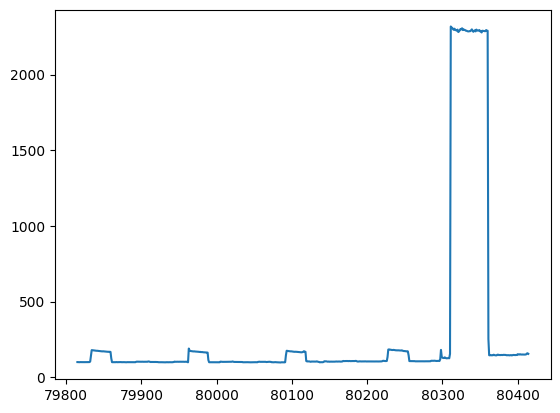

In [469]:
data.tail(600)['Wh'].plot()

In [470]:
data['Wh']

79415    103.472063
79416    102.883599
79417    103.036721
79418    103.546466
79419    103.246530
            ...    
80410    150.294326
80411    150.602410
80412    156.487720
80413    158.492560
80414    154.705630
Name: Wh, Length: 1000, dtype: float64

# k kW window graph

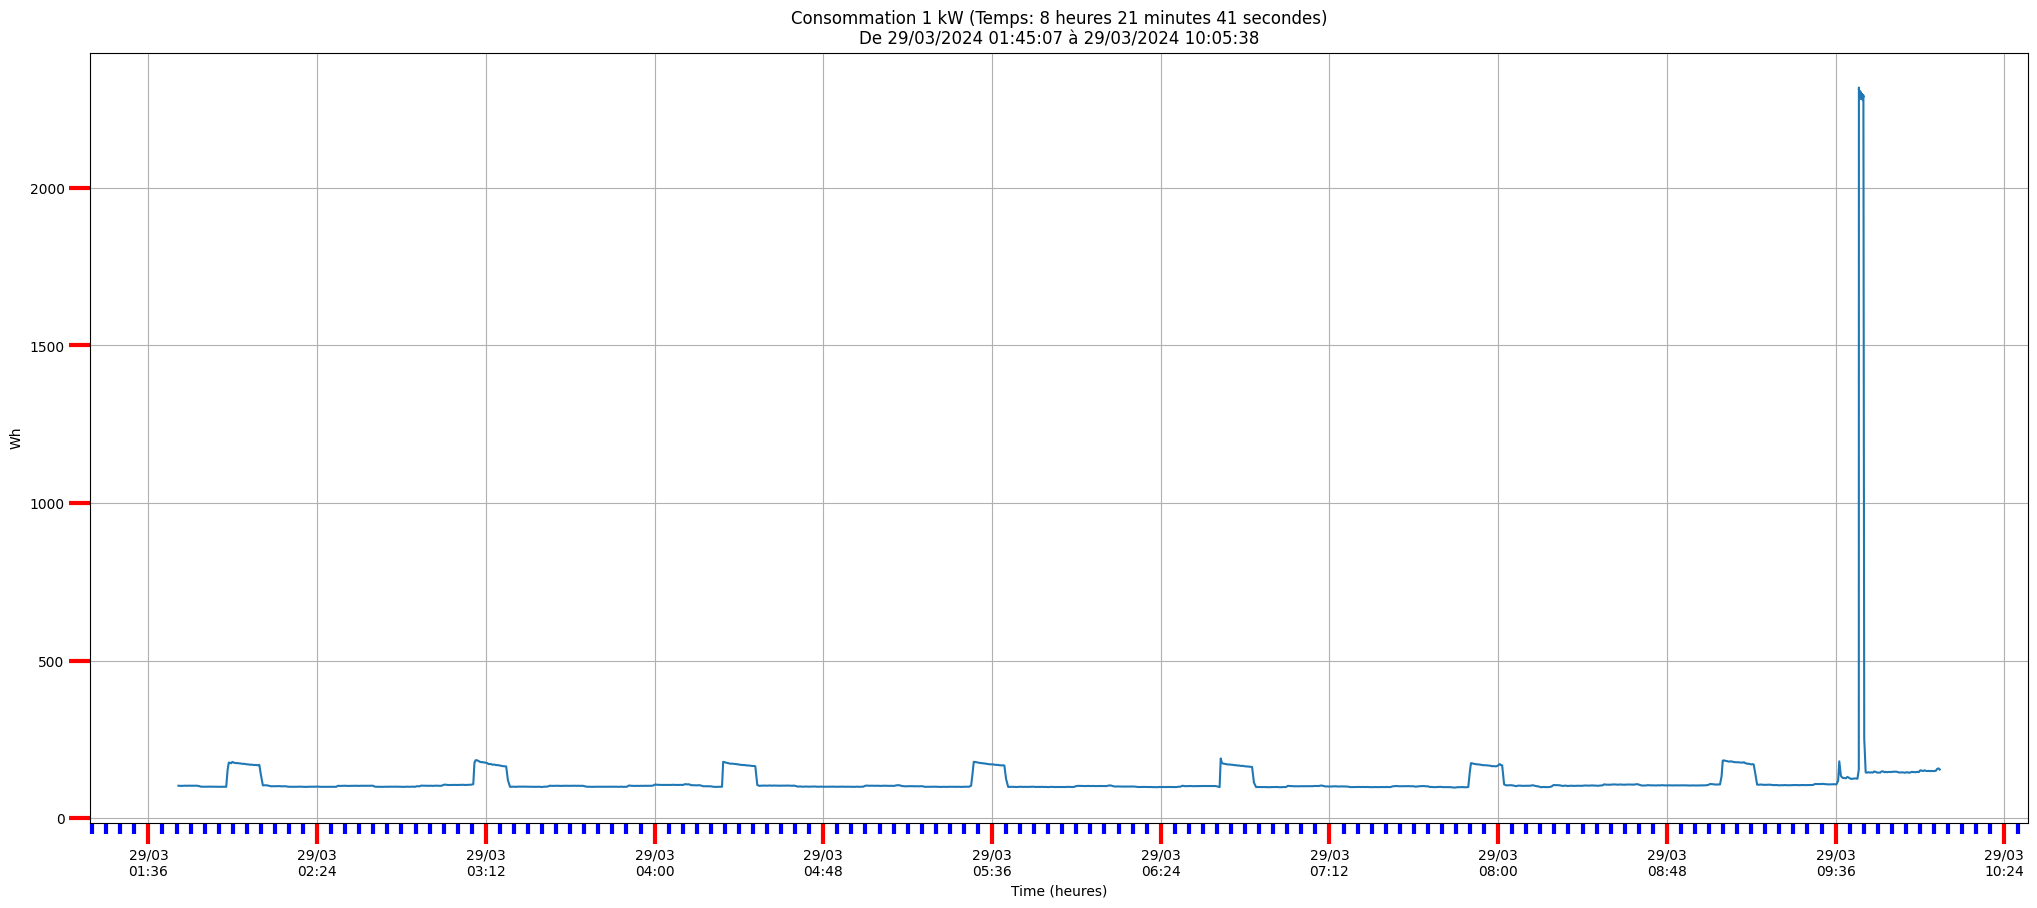

In [471]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)

formatter = DateFormatter('%d/%m\n%H:%M')
ax.xaxis.set_major_formatter(formatter)

# ticks sur axe des x
major_ticks=1/30;minor_ticks=1/360
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # 1 major tick tous les 48 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # 1 minor ticks tous les 4 min
ax.tick_params(which='both', width=3)
ax.tick_params(which='major', length=15, color='r')
ax.tick_params(which='minor', length=8, color='b')

plt.title(f'Consommation {k} kW (Temps: {heure} heures {int(mn)} minutes {int(sec)} secondes)\nDe {start} à {end}')
plt.plot(data['dates'],data['Wh'])
plt.ylabel('Wh')
plt.xlabel('Time (heures)')
plt.grid()


<Axes: ylabel='Frequency'>

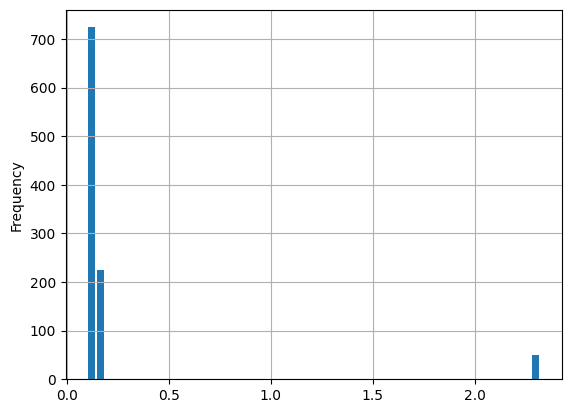

In [472]:
data.kWh.plot.hist(bins=50,rwidth=0.8,grid=True)


In [473]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms),dates,days
80410,23953,0.15,23.953,150.294326,1935170076,2024-03-29 10:04:05.999788,29/03/2024
80411,23904,0.15,23.904,150.602410,1935193980,2024-03-29 10:04:29.903788,29/03/2024
80412,23005,0.16,23.005,156.487720,1935216985,2024-03-29 10:04:52.908788,29/03/2024
80413,22714,0.16,22.714,158.492560,1935239699,2024-03-29 10:05:15.622788,29/03/2024
80414,23270,0.15,23.270,154.705630,1935262969,2024-03-29 10:05:38.892788,29/03/2024


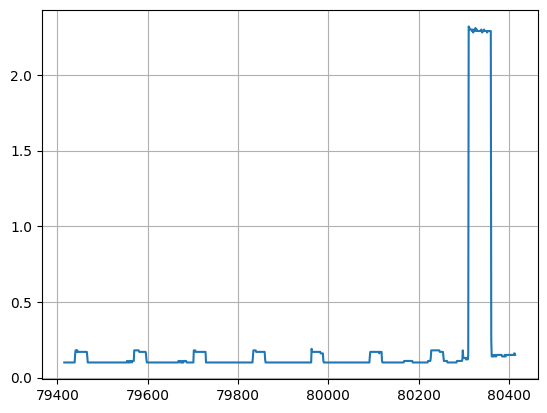

In [474]:
conso_data.tail(1000)['kWh'].plot()
plt.grid()

In [475]:
#plt.plot(conso_data['sec'])
now = dt.datetime.now()
last_cumul = np.array(conso_data['cumul(ms)'].tail(1))[0]*1000.0  # us
last_cumul, last_cumul/60e6  # min

(1935262969000.0, 32254.382816666668)

In [476]:
begin = now - dt.timedelta(microseconds=last_cumul)  #2023, 6, 24, 9, 14, (39, 942895) approximatif
now, begin

(datetime.datetime(2024, 3, 29, 10, 5, 49, 737979),
 datetime.datetime(2024, 3, 7, 0, 31, 26, 768979))

In [477]:
x = mdates.drange(begin,now,dt.timedelta(microseconds=1000000))  # seconds
len(conso_data),len(x),len(x)/3600

(80415, 1935263, 537.5730555555556)

In [478]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [479]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
base = dt.datetime(2005, 2, 1)
dates = [base + dt.timedelta(hours=(2 * i)) for i in range(732)]
N = len(dates)
N


732

In [480]:
732/12 # 60 jours

61.0

In [481]:
dates[0],dates[-1]

(datetime.datetime(2005, 2, 1, 0, 0), datetime.datetime(2005, 4, 2, 22, 0))

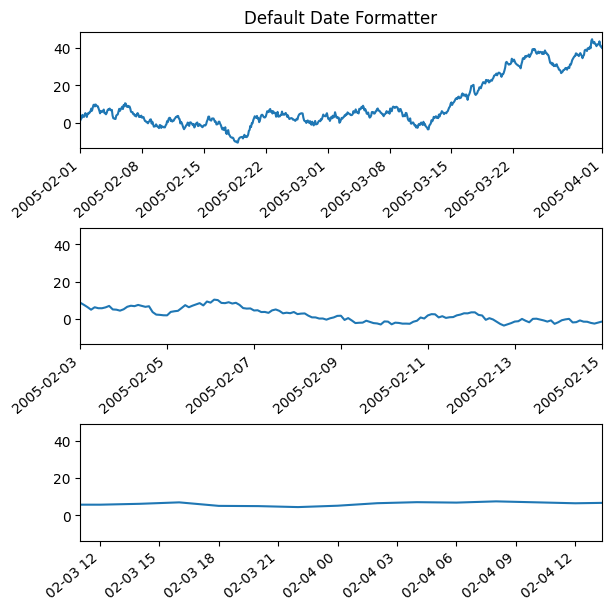

In [482]:
np.random.seed(19680801)
y = np.cumsum(np.random.randn(N))

fig, axs = plt.subplots(3, 1, layout='constrained', figsize=(6, 6))
lims = [(np.datetime64('2005-02'), np.datetime64('2005-04')),
        (np.datetime64('2005-02-03'), np.datetime64('2005-02-15')),
        (np.datetime64('2005-02-03 11:00'), np.datetime64('2005-02-04 13:20'))]
for nn, ax in enumerate(axs):
    ax.plot(dates, y)
    ax.set_xlim(lims[nn])
    # rotate_labels...
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')
axs[0].set_title('Default Date Formatter')
plt.show()

In [483]:
t = dt.datetime(2005, 4, 2, 22, 0)
t

datetime.datetime(2005, 4, 2, 22, 0)